# Random Walk Project

_October 2022_

## Description

_**Description goes here**_

## 1. Simulating the Dice Throws

We'll use the `numpy.random` package to generate pseudo-random numbers to represent the result of each dice throw, being a number from 1 to 6. A seed will be set to ensure reproducibility during every run

In [1]:
# Import numpy and set seed
import numpy as np
np.random.seed(123)

# Use randint() to simulate a dice
dice_value = np.random.randint(1, 7)
print(dice_value)

6


## 2. Coding the step rules

Starting from any floor, the next step will be computed depending on the dice result. One round of the game would look like this:

In [2]:
def next_step(current_step) :
    # Roll the dice
    dice = np.random.randint(1, 7)

    # Decide the next step
    if dice <= 2 :
        step = current_step - 1
    elif dice <= 5 :
        step = current_step + 1
    else :
        dice = np.random.randint(1,7)
        step = current_step + dice
    
    # Cann't go below 0th floor
    if step < 0 :
        step = 0

    # 0.1% probability of falling down
    if np.random.rand() <= 0.001 :
        step = 0

    return step

# Assuming a initial step
current_step = 50
next_step(current_step)

51

## 3. Generating a random walk

Starting from floor 0, we need to throw 100 times the dice and update the next step. All the updates will be recorded on a `random_walk` list

In [3]:
# NumPy is imported, seed is set

# Initialize random_walk
random_walk = [0]

# Do this 100 times
for x in range(0, 100) :
    # Set step: last element in random_walk
    current_step = random_walk[-1]
    new_step = next_step(current_step)

    # append next_step to random_walk
    random_walk.append(new_step)

# Print random_walk
print(random_walk)


[0, 0, 1, 0, 0, 0, 1, 2, 3, 4, 5, 4, 3, 4, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 15, 17, 16, 17, 18, 17, 18, 19, 21, 22, 23, 22, 23, 24, 23, 24, 25, 26, 30, 32, 34, 39, 40, 41, 40, 41, 42, 41, 40, 41, 47, 46, 45, 46, 47, 52, 51, 50, 49, 51, 52, 54, 55, 54, 55, 56, 57, 58, 57, 58, 62, 61, 62, 61, 60, 59, 58, 59, 60, 61, 62, 64, 65, 64, 63, 64, 65, 66, 68, 69, 68, 69, 70, 69, 70, 75]


## 4. Visualizing the walk

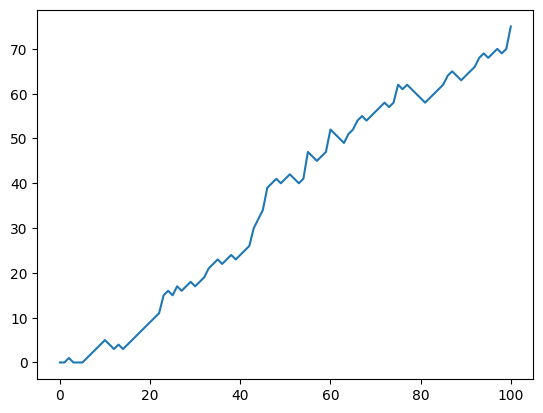

In [4]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.clf()

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

## 5. Simulating multiple random walks

The aim of the problem is to answer: what is the probability of getting to the floor 60 or higher after 100 steps?
To answer that question we need to simulate multiple random walks, so that we can get a distribution of the final floor on each walk and hence compute a probability based on these stocastics.

In [5]:
all_walks = []

for i in range(1000) :
    random_walk = [0]
    for x in range(100) :
        current_step = random_walk[-1]
        new_step = next_step(current_step)

        random_walk.append(new_step)
    all_walks.append(random_walk)

# all_walks will be a list of random walks
np_aw = np.array(all_walks)
print(np_aw)

[[ 0  0  0 ... 90 91 90]
 [ 0  1  2 ... 81 82 83]
 [ 0  0  1 ... 67 66 67]
 ...
 [ 0  0  0 ... 59 60 64]
 [ 0  0  0 ... 46 48 47]
 [ 0  1  0 ... 83 84 89]]


This is how all the walks behaved

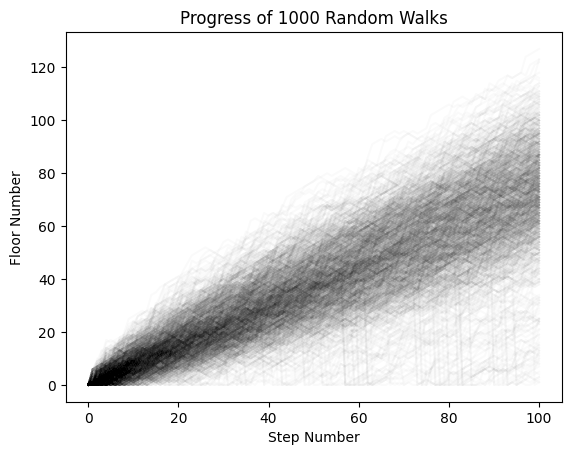

In [6]:
# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t, alpha=0.02, color='black')

plt.xlabel('Step Number')
plt.ylabel('Floor Number')
plt.title('Progress of 1000 Random Walks')

plt.show()

The distribution of the last floor reached for the 1000 simulated walks would now be the following

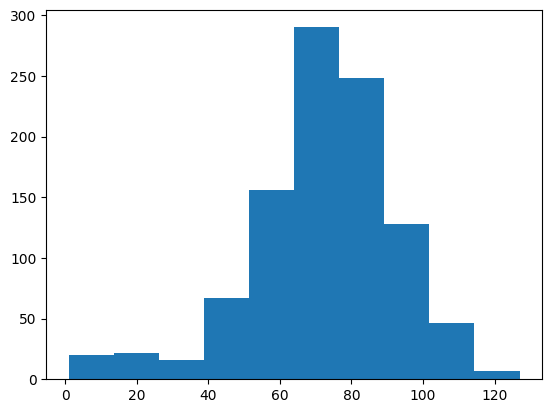

In [7]:
# Select last row from np_aw_t: ends
ends = np_aw_t[-1, :]

# Plot histogram of ends, display plot
plt.clf()
plt.hist(ends)
plt.show()

Some base stats

In [8]:
ends_mean = np.mean(ends)
print(f'Mean: {ends_mean}')

ends_median = np.median(ends)
print(f'Median: {ends_median}')

Mean: 72.074
Median: 73.5


The probability of reaching the 60th or higher would be

In [9]:
len(ends[ends >= 60]) / len(ends)

0.787